# Projet Data_Mining Réalisé par : Kaoutar BENSALIM

Ce projet de Data Mining est un projet qu'on peut le voir sur 4 étapes: 

1) Data understanding, et une examination de la dataset que nos objectifs de cleaning soient claires.
2) Cleaning: Traitement de la base de données afin qu'elle deviendra analysable ou facile à analyser.
3) EDA = Exploratory Data Analysis : Cette étape permet d'explorer les données; les relations entre les features, l'évolution des données numériques per exemple. Cette étape est primordiale car elle nous permet de comprendre en profondeur notre dataset
4) Enfin, l'étape de prédiction où on va prédir le nombre de passagers que qatar airlines va connaitre durant l'année fiscale 2023/2024. 

![Mind map](map.png)

## **1) Data Understanding**


This dataset contains reviews of  Airlines based on various parameters provided by passengers, but we gonna focus just on the case of **Qatar Airlines**. The reviews encompass details about the review, the reviewer and the flight.

Here's a Variables Table summarizing the information about each column in the dataset:

Variable Name	| Description |	Data Type|
|---------------|--------------|-----------|
Title|	Title of the review	|Text
Name|	Author of the review	|Text
Review Date |Date when the review was published|	text
Airline| the airline with which the reviewer had the flight | text
Verified|	Verification status of the review (False= not verified, True=verified)	|text
Reviews|	Detailed body of the review	|Text
Type Of Traveller|	Type of traveler (e.g., Business, Leisure)	|Text
Month Flown|	Date when the flight took place|	Text
Route|	Flight route details	|Text
Class|	Type of seat (e.g., Economy, Business)	|Text
Seat Confort | Rating of the Seat Confort (from 1 to 5)	|Numeric
Staff Service | Rating of the Staff Service (from 1 to 5)	|Numeric
Food & Beverages | Rating of the Food & Beverages (from 1 to 5)	|Numeric
Inflight Entertainment | Rating of the Inflight Entertainment (from 1 to 5)	|Numeric
Value For Money | Rating of the Value For Money (from 1 to 5)	|Numeric
Overall Rating	|Passenger's rating for the airline experience	|Numeric
Recommended|	Recommendation status (no, yes)	|Text



In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

In [2]:
import warnings

# Ignorer tous les avertissements
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("airlines_reviews.csv")

In [4]:
data

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,an uneventful flight,N Vickers,2016-06-20,Korean Air,True,"KE124, Brisbane to Incheon (A330) and KE867,...",Business,June 2016,BNE to ULN via ICN,Economy Class,5,4,5,3,4,7,yes
8096,Korean Air always impresses,Kim Holloway,2016-06-12,Korean Air,False,Our recent flight was our fourth trip to the...,Couple Leisure,June 2016,SYD to LHR via ICN,Economy Class,3,5,5,4,5,10,yes
8097,didn’t offer anything,C Clark,2016-06-06,Korean Air,True,I flew Korean Air from Bali to Seoul in Pres...,Business,April 2016,DPS to ICN,Business Class,4,5,5,5,1,2,no
8098,appreciated the service onboard,E Petan,2016-04-21,Korean Air,False,Seoul to Paris with Korean Air. I am traveli...,Business,April 2016,ICN to CDG,Business Class,5,1,3,4,5,10,yes


In [5]:
data["Airline"].unique()

array(['Singapore Airlines', 'Qatar Airways', 'All Nippon Airways',
       'Emirates', 'Japan Airlines', 'Turkish Airlines', 'Air France',
       'Cathay Pacific Airways', 'EVA Air', 'Korean Air'], dtype=object)

In [6]:
qatar=data[data["Airline"]=='Qatar Airways']


In [7]:
qatar

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
972,“marred by inconveniences”,Mary Le,2024-03-02,Qatar Airways,False,The delay of my flight from Haneda to Doha ca...,Solo Leisure,March 2024,Tokyo to London Heathrow via Doha,Economy Class,4,2,4,4,1,1,no
973,seat wouldn't stay up,Brian English,2024-02-29,Qatar Airways,True,They convinced me that I needed to pay $1500...,Couple Leisure,February 2024,Doha to Montreal,Business Class,1,1,2,1,1,1,no
974,no attempt to address our complaint,Wayne Burgess,2024-02-29,Qatar Airways,True,I have sent 5 emails and have only received ...,Business,November 2023,Doha to Perth,Economy Class,1,3,2,2,1,1,no
975,“I hope they update the A380”,Alwaleed Althani,2024-02-25,Qatar Airways,True,We flew on probably the first A380 the airlin...,Couple Leisure,February 2024,Doha to London Heathrow,First Class,2,5,4,2,4,10,yes
976,I’d rate them maybe 7/10,W Warnock,2024-02-22,Qatar Airways,True,"Service was ok, pretty good on my aisle and ...",Couple Leisure,February 2024,Auckland to Doha,Business Class,5,3,4,3,4,7,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,all flights on time,C Stanhope,2016-03-31,Qatar Airways,True,London to Colombo via Doha with Qatar Airway...,Couple Leisure,March 2016,EDI to MLE via DOH,Economy Class,5,4,3,3,3,10,no
2592,experience was excellent,C Kay,2016-03-30,Qatar Airways,False,Edinburgh to Male via Doha return in Qatar A...,Couple Leisure,March 2016,AMS to BKK via DOH,Business Class,3,2,5,4,5,7,yes
2593,"very polite, friendly and smiling",M Mawanga,2016-03-28,Qatar Airways,True,London Heathrow to Cape Town via Doha with Q...,Solo Leisure,February 2016,CPH to MEL via DOH,Economy Class,5,5,4,4,5,10,yes
2594,fantastic business class experience,A Ahmed,2016-03-26,Qatar Airways,False,Copenhagen to Melbourne visa Doha return. Th...,Solo Leisure,February 2016,DXB to LHR via DOH,Business Class,3,2,5,4,5,1,yes


In [8]:
qatar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1624 entries, 972 to 2595
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1624 non-null   object
 1   Name                    1624 non-null   object
 2   Review Date             1624 non-null   object
 3   Airline                 1624 non-null   object
 4   Verified                1624 non-null   object
 5   Reviews                 1624 non-null   object
 6   Type of Traveller       1624 non-null   object
 7   Month Flown             1624 non-null   object
 8   Route                   1624 non-null   object
 9   Class                   1624 non-null   object
 10  Seat Comfort            1624 non-null   int64 
 11  Staff Service           1624 non-null   int64 
 12  Food & Beverages        1624 non-null   int64 
 13  Inflight Entertainment  1624 non-null   int64 
 14  Value For Money         1624 non-null   int64 
 15  Overall

- Absence des valeurs nulles
- On remarque de plus que les colonnes `Review Date`et `Month Flown` sont de type objet (c-à-d str) ce qui doit être transformé en date.

In [9]:
type(qatar['Review Date'].iloc[0])


str

In [10]:
print("Les valeurs uniques de la colonne 'Type of Traveller':  ",data['Type of Traveller'].unique())
print("\nLes valeurs uniques de la colonne 'Class':  ",data['Class'].unique())
print("\nLes valeurs uniques de la colonne 'Verified':  ",data['Verified'].unique())
print("\nLes valeurs uniques de la colonne 'Recommended':  ",data['Recommended'].unique())

Les valeurs uniques de la colonne 'Type of Traveller':   ['Solo Leisure' 'Family Leisure' 'Business' 'Couple Leisure']

Les valeurs uniques de la colonne 'Class':   ['Business Class' 'Economy Class' 'Premium Economy' 'First Class']

Les valeurs uniques de la colonne 'Verified':   ['True' 'False' '*Unverified*' 'NotVerified'
 'we do appreciate you bringing this matter to our attention. Please accept my apologies for not having met your expectations; I do hope that we can leave you and your family with a more positive impression on your future flights with us']

Les valeurs uniques de la colonne 'Recommended':   ['yes' 'no']


- On remarque que pour les trois colonnes 'Type of Traveller', 'Class' et 'Recommended' on n'a pas des valeurs répétées.

- Alors que pour la colonne Verified, on a la présence de ces trois valeurs: False, *Unverified* et NotVerified et qui signifient la même chose. donc ils sont à traiter.

In [11]:
print("max de 'Seat Comfort'", qatar['Seat Comfort'].max())
print("min de 'Seat Comfort'", qatar['Seat Comfort'].min())
print("\nmax de 'Staff Service'", qatar['Staff Service'].max())
print("min de 'Staff Service'", qatar['Staff Service'].min())
print("\nmax de 'Food & Beverages'", qatar['Food & Beverages'].max())
print("min de 'Food & Beverages'", qatar['Food & Beverages'].min())
print("\nmax de 'Inflight Entertainment'", qatar['Inflight Entertainment'].max())
print("min de 'Inflight Entertainment'", qatar['Inflight Entertainment'].min())
print("\nmax de 'Value For Money'", qatar['Value For Money'].max())
print("min de 'Value For Money'", qatar['Value For Money'].min())
print("\nmax de 'Overall Rating'", qatar['Overall Rating'].max())
print("min de Overall Rating'", qatar['Overall Rating'].min())
 

max de 'Seat Comfort' 5
min de 'Seat Comfort' 1

max de 'Staff Service' 5
min de 'Staff Service' 1

max de 'Food & Beverages' 5
min de 'Food & Beverages' 1

max de 'Inflight Entertainment' 5
min de 'Inflight Entertainment' 1

max de 'Value For Money' 5
min de 'Value For Money' 1

max de 'Overall Rating' 10
min de Overall Rating' 1


- Les valeurs de rating sont dans la norme, pas de valeurs aberrantes et illogiques

In [12]:
data.duplicated().sum()

0

- Il n'y a pas des valeurs dupliquées.

# 2) Cleaning

### Les tâches à faire:

1) Supprimer les colonnes 'Name', 'Title' et 'Reviews'.
2) trnsformer les colonnes 'Review Date' et 'Month Flown' en des dates.
3) Ajuster les valeurs de la colonne 'Verified'.

In [13]:
qatar.reset_index(drop=True,inplace=True)
qatar.drop(['Title','Name','Reviews','Airline'], axis = 1, inplace = True)


In [14]:
qatar['Review Date'] = pd.to_datetime(qatar['Review Date'], format = '%Y-%m-%d')


In [15]:
qatar.shape[0]

1624

In [16]:
# Transformer la colonne `Month Flown` en un datetime.
months={'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06','July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'}
for i in range(qatar.shape[0]):
        str=qatar['Month Flown'].iloc[i].split(" ")
        str[0]=months[str[0]]
        r=str[0]
        str[0]=str[1]
        str[1]=r
        qatar['Month Flown'].iloc[i]="-".join(str)

In [17]:
qatar['Month Flown'] = pd.to_datetime(qatar['Month Flown'], format = '%Y-%m')


In [18]:
qatar.head()

,Review Date,Verified,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,2024-03-02,False,Solo Leisure,2024-03-01,Tokyo to London Heathrow via Doha,Economy Class,4,2,4,4,1,1,no
1,2024-02-29,True,Couple Leisure,2024-02-01,Doha to Montreal,Business Class,1,1,2,1,1,1,no
2,2024-02-29,True,Business,2023-11-01,Doha to Perth,Economy Class,1,3,2,2,1,1,no
3,2024-02-25,True,Couple Leisure,2024-02-01,Doha to London Heathrow,First Class,2,5,4,2,4,10,yes
4,2024-02-22,True,Couple Leisure,2024-02-01,Auckland to Doha,Business Class,5,3,4,3,4,7,no


In [19]:
l=['*Unverified*','NotVerified']
str1='we do appreciate you bringing this matter to our attention. Please accept my apologies for not having met your expectations; I do hope that we can leave you and your family with a more positive impression on your future flights with us'
for i in range(qatar.shape[0]):
    if qatar['Verified'].iloc[i] in l: 
        qatar['Verified'].iloc[i]='False'
    elif qatar['Verified'].iloc[i]==str1:
        qatar.drop(i, inplace=True)



In [20]:
qatar['Verified'].unique()

array(['False', 'True'], dtype=object)

# 3) EDA

### Ce qu'on va faire:
- moy de tout les ratings
- pourcentage de verified et not verified
- pourcentage de recommended et not recommended
- densité des ratings
- tout les ratings en fct de Class ou Type of Traveller
- Évolution des Rating en fct du temps
- Évolution du nombre de reviews en fonction de la date du vol
- Heatmap des corrélations entre les ratings
- Transformer les deux colonnes **Class** et **Type of Traveller** de catégories en numérique en utilisant "get dummies".
- On utilise 'Label encoder' pour transformer les deux colonnes **Verified** et **Recommended** en des 0 et des 1.
- Réduction avec PCA (On veut juste avoir une idée sur la possibilité de réduire les featues)

In [21]:
verified= qatar['Verified'].value_counts()
print(verified/len(qatar)*100)

recommended= qatar['Recommended'].value_counts()
print(recommended/len(qatar)*100)



Verified
True     80.726601
False    19.273399
Name: count, dtype: float64
Recommended
yes    72.598522
no     27.401478
Name: count, dtype: float64


- On peut lire que la plupart des revues sont verifiées, et 70% recommendent le service de qatar airways

In [22]:
print("La moyenne de Overall Rating est:  ",qatar['Overall Rating'].mean())
print("La moyenne de Seat Comfort est:  ",qatar['Seat Comfort'].mean())
print("La moyenne de Staff Service est:  ",qatar['Staff Service'].mean())
print("La moyenne de Food & Beverages est:  ",qatar['Food & Beverages'].mean())
print("La moyenne de Inflight Entertainment est:  ",qatar['Inflight Entertainment'].mean())
print("La moyenne de Value For Money est:  ",qatar['Value For Money'].mean())

La moyenne de Overall Rating est:   7.195812807881773
La moyenne de Seat Comfort est:   3.9698275862068964
La moyenne de Staff Service est:   4.294334975369458
La moyenne de Food & Beverages est:   3.9279556650246303
La moyenne de Inflight Entertainment est:   4.119458128078818
La moyenne de Value For Money est:   3.7986453201970445


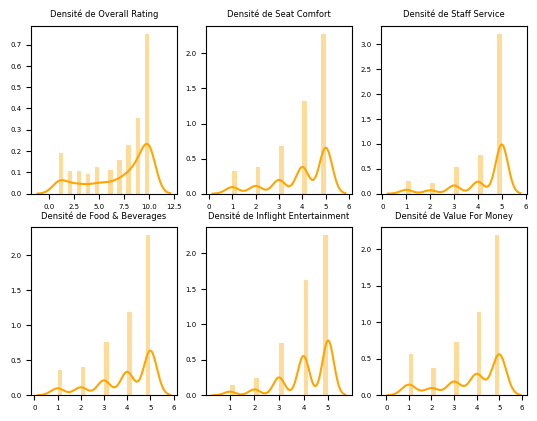

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=3)
L=['Overall Rating','Seat Comfort','Staff Service','Food & Beverages','Inflight Entertainment','Value For Money']
for (x,ax) in zip(L,axs.flat):
    sns.distplot(qatar[x], bins = 20 , color='orange',ax=ax)
    ax.set_title("Densité de "+ x,  fontsize=6)
    ax.tick_params(axis='x', labelsize=5)  # Changer la taille de la police des marques sur l'axe x à 8 points
    ax.tick_params(axis='y', labelsize=5)
    ax.set_xlabel('') 
    ax.set_ylabel('')

plt.show()

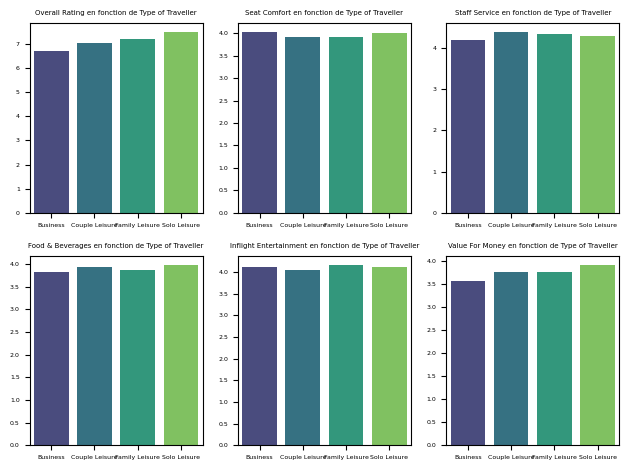

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=3)
L=['Overall Rating','Seat Comfort','Staff Service','Food & Beverages','Inflight Entertainment','Value For Money']
for i, y in enumerate(L):
    row = i // 3
    col = i % 3
    mean = qatar.groupby('Type of Traveller')[y].mean().reset_index()
    ax = axs[row, col]
    sns.barplot(x='Type of Traveller', y=y, data=mean, palette='viridis', ax=ax)
    ax.set_title(y + " en fonction de Type of Traveller", fontsize=5)
    ax.tick_params(axis='x', labelsize=4.5)
    ax.tick_params(axis='y', labelsize=4.5)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustez l'espacement entre les sous-tracés
plt.tight_layout()

# Affichez les tracés
plt.show()



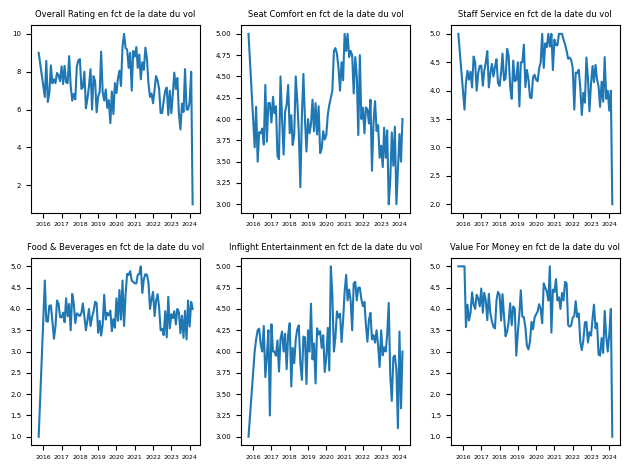

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=3)
L=['Overall Rating','Seat Comfort','Staff Service','Food & Beverages','Inflight Entertainment','Value For Money']
for i, y in enumerate(L):
    row = i // 3
    col = i % 3
    mean = qatar.groupby('Month Flown')[y].mean().reset_index()
    ax = axs[row, col]
    sns.lineplot(x='Month Flown', y=y, data=mean, ax=ax)
    ax.set_title(y+ " en fct de la date du vol", fontsize=6)
    ax.tick_params(axis='x', labelsize=4.5)
    ax.tick_params(axis='y', labelsize=5)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustez l'espacement entre les sous-tracés
plt.tight_layout()

# Affichez les tracés
plt.show()



On remarque qu'il y a un pattern différent entre 2020 et 2022 ce qui est normal, il est dû à la pandémie covid 19. Sinon on remarque que le rating de Seat Comfort, Inflight Entertainement et Value for maney connaissent une tendance à la diminution.  alors que les autres ratings tels que Staff Service, Food & Beverage et Overall Rating restent relativement constants.

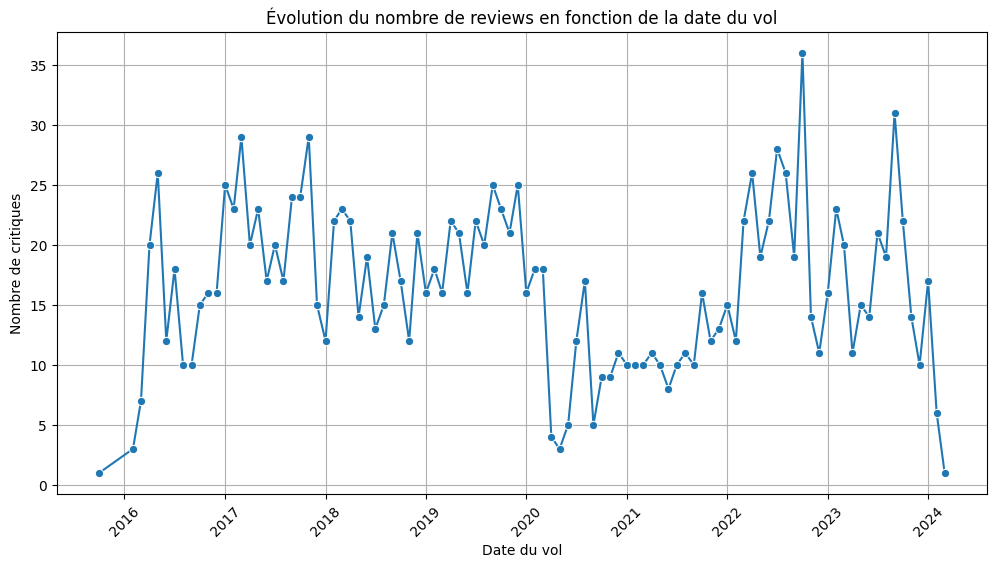

In [26]:
nombre_reviews_par_date = qatar['Month Flown'].value_counts().sort_index()

# Créer un graphique de ligne
plt.figure(figsize=(12, 6))
sns.lineplot(x=nombre_reviews_par_date.index, y=nombre_reviews_par_date.values, marker='o')
plt.title('Évolution du nombre de reviews en fonction de la date du vol')
plt.xlabel('Date du vol')
plt.ylabel('Nombre de critiques')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Heatmap des corrélations entre les ratings')

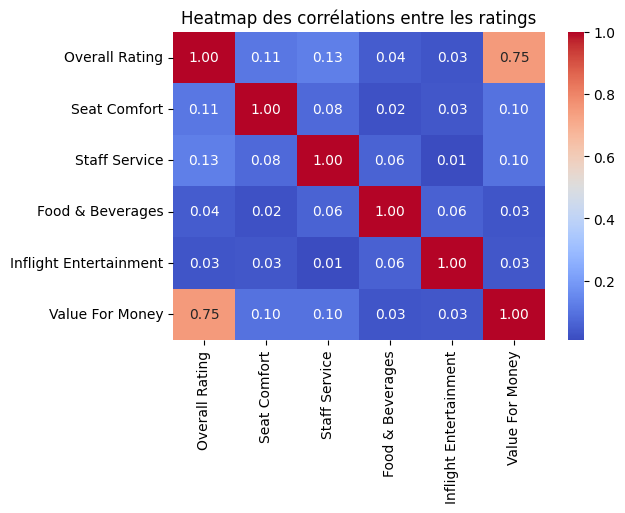

In [27]:
#Heat map

corr_matrix = qatar[L].corr()

# Créer la heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap des corrélations entre les ratings')

On remarque que presque tout les colonnes ne sont pas corrélées sauf pour Overall Rating avec Value For Money qui sont corrélées de 75%. 

In [28]:
data=qatar[['Review Date','Verified','Type of Traveller','Month Flown','Route','Class','Seat Comfort','Staff Service','Food & Beverages','Inflight Entertainment','Value For Money','Overall Rating','Recommended']]
class_dummies= pd.get_dummies(data['Class'])
data_with_dummies = pd.concat([data, class_dummies], axis=1)
data_with_dummies.drop(['Class'],axis=1,inplace=True)
data_with_dummies.head()

,Review Date,Verified,Type of Traveller,Month Flown,Route,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Business Class,Economy Class,First Class,Premium Economy
0,2024-03-02,False,Solo Leisure,2024-03-01,Tokyo to London Heathrow via Doha,4,2,4,4,1,1,no,False,True,False,False
1,2024-02-29,True,Couple Leisure,2024-02-01,Doha to Montreal,1,1,2,1,1,1,no,True,False,False,False
2,2024-02-29,True,Business,2023-11-01,Doha to Perth,1,3,2,2,1,1,no,False,True,False,False
3,2024-02-25,True,Couple Leisure,2024-02-01,Doha to London Heathrow,2,5,4,2,4,10,yes,False,False,True,False
4,2024-02-22,True,Couple Leisure,2024-02-01,Auckland to Doha,5,3,4,3,4,7,no,True,False,False,False


In [29]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Review Date             1624 non-null   datetime64[ns]
 1   Verified                1624 non-null   object        
 2   Type of Traveller       1624 non-null   object        
 3   Month Flown             1624 non-null   datetime64[ns]
 4   Route                   1624 non-null   object        
 5   Seat Comfort            1624 non-null   int64         
 6   Staff Service           1624 non-null   int64         
 7   Food & Beverages        1624 non-null   int64         
 8   Inflight Entertainment  1624 non-null   int64         
 9   Value For Money         1624 non-null   int64         
 10  Overall Rating          1624 non-null   int64         
 11  Recommended             1624 non-null   object        
 12  Business Class          1624 non-null   bool    

In [30]:
class_dummies= pd.get_dummies(data_with_dummies['Type of Traveller'])
data = pd.concat([data_with_dummies, class_dummies], axis=1)
data.drop(['Type of Traveller'],axis=1,inplace=True)
data.head()

,Review Date,Verified,Month Flown,Route,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Business Class,Economy Class,First Class,Premium Economy,Business,Couple Leisure,Family Leisure,Solo Leisure
0,2024-03-02,False,2024-03-01,Tokyo to London Heathrow via Doha,4,2,4,4,1,1,no,False,True,False,False,False,False,False,True
1,2024-02-29,True,2024-02-01,Doha to Montreal,1,1,2,1,1,1,no,True,False,False,False,False,True,False,False
2,2024-02-29,True,2023-11-01,Doha to Perth,1,3,2,2,1,1,no,False,True,False,False,True,False,False,False
3,2024-02-25,True,2024-02-01,Doha to London Heathrow,2,5,4,2,4,10,yes,False,False,True,False,False,True,False,False
4,2024-02-22,True,2024-02-01,Auckland to Doha,5,3,4,3,4,7,no,True,False,False,False,False,True,False,False


In [31]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit label encoder and transform the categorical column
data['Verified'] = label_encoder.fit_transform(data['Verified'])
data['Recommended'] = label_encoder.fit_transform(data['Recommended'])
data.head()


,Review Date,Verified,Month Flown,Route,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Business Class,Economy Class,First Class,Premium Economy,Business,Couple Leisure,Family Leisure,Solo Leisure
0,2024-03-02,0,2024-03-01,Tokyo to London Heathrow via Doha,4,2,4,4,1,1,0,False,True,False,False,False,False,False,True
1,2024-02-29,1,2024-02-01,Doha to Montreal,1,1,2,1,1,1,0,True,False,False,False,False,True,False,False
2,2024-02-29,1,2023-11-01,Doha to Perth,1,3,2,2,1,1,0,False,True,False,False,True,False,False,False
3,2024-02-25,1,2024-02-01,Doha to London Heathrow,2,5,4,2,4,10,1,False,False,True,False,False,True,False,False
4,2024-02-22,1,2024-02-01,Auckland to Doha,5,3,4,3,4,7,0,True,False,False,False,False,True,False,False


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Verified','Seat Comfort','Staff Service','Food & Beverages','Inflight Entertainment','Value For Money','Overall Rating','Recommended','Business Class','Economy Class','First Class','Premium Economy','Business','Couple Leisure','Family Leisure','Solo Leisure']].values)
scaled_df = pd.DataFrame(scaled_data)
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-2.046582,0.024740,-2.016996,0.057465,-0.117005,-2.045805,-2.010987,-1.627709,-0.757393,0.793024,-0.132453,-0.065795,-0.453478,-0.541289,-0.435596,1.120516
1,0.488620,-2.435111,-2.896116,-1.537805,-3.055386,-2.045805,-2.010987,-1.627709,1.320319,-1.260996,-0.132453,-0.065795,-0.453478,1.847442,-0.435596,-0.892446
2,0.488620,-2.435111,-1.137876,-1.537805,-2.075926,-2.045805,-2.010987,-1.627709,-0.757393,0.793024,-0.132453,-0.065795,2.205179,-0.541289,-0.435596,-0.892446
3,0.488620,-1.615161,0.620364,0.057465,-2.075926,0.147190,0.910160,0.614360,-0.757393,-1.260996,7.549834,-0.065795,-0.453478,1.847442,-0.435596,-0.892446
4,0.488620,0.844690,-1.137876,0.057465,-1.096465,0.147190,-0.063555,-1.627709,1.320319,-1.260996,-0.132453,-0.065795,-0.453478,1.847442,-0.435596,-0.892446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,0.488620,0.844690,-0.258756,-0.740170,-1.096465,-0.583808,0.910160,-1.627709,-0.757393,0.793024,-0.132453,-0.065795,-0.453478,1.847442,-0.435596,-0.892446
1620,-2.046582,-0.795210,-2.016996,0.855100,-0.117005,0.878188,-0.063555,0.614360,1.320319,-1.260996,-0.132453,-0.065795,-0.453478,1.847442,-0.435596,-0.892446
1621,0.488620,0.844690,0.620364,0.057465,-0.117005,0.878188,0.910160,0.614360,-0.757393,0.793024,-0.132453,-0.065795,-0.453478,-0.541289,-0.435596,1.120516
1622,-2.046582,-0.795210,-2.016996,0.855100,-0.117005,0.878188,-2.010987,0.614360,1.320319,-1.260996,-0.132453,-0.065795,-0.453478,-0.541289,-0.435596,1.120516


In [33]:
from sklearn.decomposition import PCA

In [34]:
sklearn_pca = PCA(n_components=2)
reduced_data = sklearn_pca.fit_transform(scaled_df.values)
print("Pourcentage de variance expliquée : ")
print(sklearn_pca.explained_variance_ratio_)

Pourcentage de variance expliquée : 
[0.16417817 0.12854464]


In [35]:
reduced_data

array([[ 3.14951843, -0.46444642],
       [ 3.56619603,  2.78306859],
       [ 4.1044129 ,  0.50601568],
       ...,
       [-1.35571844, -1.48477385],
       [-0.27171337,  1.56360325],
       [ 1.48320333, -0.46469662]])


Shape : (1624, 0)
Pourcentages de variance expliquée :
Variance totale expliquée : 0.00%

Shape : (1624, 1)
Pourcentages de variance expliquée :16.42%  
Variance totale expliquée : 16.42%

Shape : (1624, 2)
Pourcentages de variance expliquée :16.42%  12.85%  
Variance totale expliquée : 29.27%

Shape : (1624, 3)
Pourcentages de variance expliquée :16.42%  12.85%  9.63%  
Variance totale expliquée : 38.90%

Shape : (1624, 4)
Pourcentages de variance expliquée :16.42%  12.85%  9.63%  7.96%  
Variance totale expliquée : 46.86%

Shape : (1624, 5)
Pourcentages de variance expliquée :16.42%  12.85%  9.63%  7.96%  6.96%  
Variance totale expliquée : 53.82%

Shape : (1624, 6)
Pourcentages de variance expliquée :16.42%  12.85%  9.63%  7.96%  6.96%  6.84%  
Variance totale expliquée : 60.66%

Shape : (1624, 7)
Pourcentages de variance expliquée :16.42%  12.85%  9.63%  7.96%  6.96%  6.84%  6.64%  
Variance totale expliquée : 67.30%

Shape : (1624, 8)
Pourcentages de variance expliquée :16.42%  1

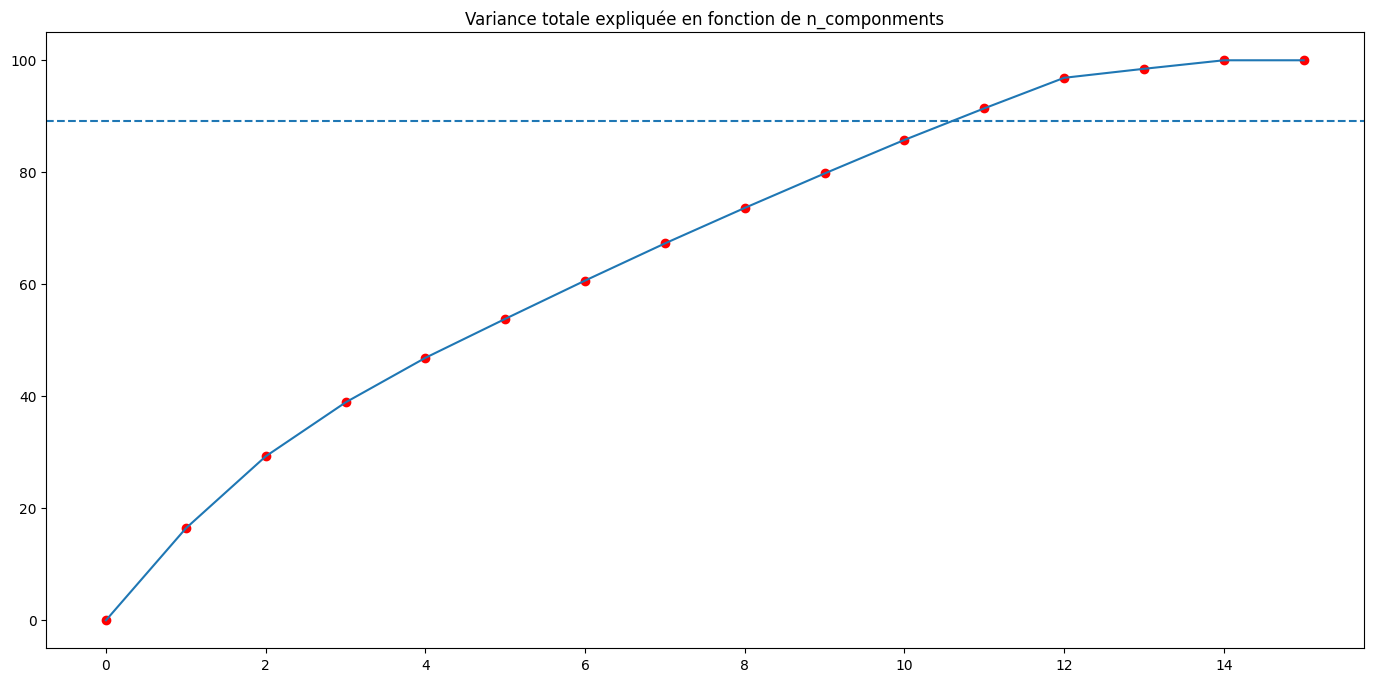

In [36]:
variance_totale = []

for i in range(16):
    pca = PCA(i)
    reduced_data = pca.fit_transform(scaled_df.values)
    print("\nShape : {}".format(reduced_data.shape))
    s = "{:.2f}%  "*(i)
    print("Pourcentages de variance expliquée :"+s.format(*pca.explained_variance_ratio_*100))
    variance = pca.explained_variance_ratio_.sum()*100
    variance_totale.append(variance)
    print("Variance totale expliquée : {:.2f}%".format(variance))

plt.figure(figsize=(17,8))
plt.plot(variance_totale)
plt.scatter(np.arange(16), variance_totale, color='red')
plt.axhline(89.19, linestyle='--')
plt.title("Variance totale expliquée en fonction de n_componments")
plt.show()


- On remarque qu'avec 12 features notre BD est très bien expliqué, on va voir ceci en pourcentage :

In [37]:
sklearn_pca = PCA(n_components=12)
reduced_data = sklearn_pca.fit_transform(scaled_df.values)
print("Pourcentage de variance expliquée : ")
print(sklearn_pca.explained_variance_ratio_.sum()*100)

Pourcentage de variance expliquée : 
96.87069400721579


# 4) Prediction


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Review Date             1624 non-null   datetime64[ns]
 1   Verified                1624 non-null   int32         
 2   Month Flown             1624 non-null   datetime64[ns]
 3   Route                   1624 non-null   object        
 4   Seat Comfort            1624 non-null   int64         
 5   Staff Service           1624 non-null   int64         
 6   Food & Beverages        1624 non-null   int64         
 7   Inflight Entertainment  1624 non-null   int64         
 8   Value For Money         1624 non-null   int64         
 9   Overall Rating          1624 non-null   int64         
 10  Recommended             1624 non-null   int32         
 11  Business Class          1624 non-null   bool          
 12  Economy Class           1624 non-null   bool    

In [39]:
# On ajoute la colonne fiscal_year qui va préciser pour chaque ligne l'année fiscale où elle appartient.
data['fiscal_year'] = (data['Month Flown'] + pd.offsets.DateOffset(months=9)).dt.year
data.head()

,Review Date,Verified,Month Flown,Route,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Business Class,Economy Class,First Class,Premium Economy,Business,Couple Leisure,Family Leisure,Solo Leisure,fiscal_year
0,2024-03-02,0,2024-03-01,Tokyo to London Heathrow via Doha,4,2,4,4,1,1,0,False,True,False,False,False,False,False,True,2024
1,2024-02-29,1,2024-02-01,Doha to Montreal,1,1,2,1,1,1,0,True,False,False,False,False,True,False,False,2024
2,2024-02-29,1,2023-11-01,Doha to Perth,1,3,2,2,1,1,0,False,True,False,False,True,False,False,False,2024
3,2024-02-25,1,2024-02-01,Doha to London Heathrow,2,5,4,2,4,10,1,False,False,True,False,False,True,False,False,2024
4,2024-02-22,1,2024-02-01,Auckland to Doha,5,3,4,3,4,7,0,True,False,False,False,False,True,False,False,2024


In [40]:
# Importer la Dataset "satar airways passengers.csv"
passengers= pd.read_csv("qatar airways passengers.csv")
passengers

,fiscal_year,number of passengers (Million)
0,2016,26.65
1,2017,32.01
2,2018,29.16
3,2019,29.48
4,2020,32.36
5,2021,5.83
6,2022,18.55
7,2023,31.70
8,2024,NaN


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Review Date             1624 non-null   datetime64[ns]
 1   Verified                1624 non-null   int32         
 2   Month Flown             1624 non-null   datetime64[ns]
 3   Route                   1624 non-null   object        
 4   Seat Comfort            1624 non-null   int64         
 5   Staff Service           1624 non-null   int64         
 6   Food & Beverages        1624 non-null   int64         
 7   Inflight Entertainment  1624 non-null   int64         
 8   Value For Money         1624 non-null   int64         
 9   Overall Rating          1624 non-null   int64         
 10  Recommended             1624 non-null   int32         
 11  Business Class          1624 non-null   bool          
 12  Economy Class           1624 non-null   bool    

In [42]:
columns=['Verified','Seat Comfort','Staff Service','Food & Beverages','Inflight Entertainment','Value For Money','Overall Rating','Recommended','Business Class','Economy Class','First Class','Premium Economy','Business','Couple Leisure','Family Leisure','Solo Leisure']
# Initialize an empty DataFrame to store mean ratings for each column
mean_ratings = pd.read_csv('qatar airways passengers.csv')
mean_ratings.drop('number of passengers (Million)',axis=1,inplace=True)

# Calculate mean rating for each column and store it in the DataFrame
for column in columns:
    mean_per_year = data.groupby('fiscal_year')[column].mean().reset_index()
    mean_per_year.rename(columns={column: f'{column}'}, inplace=True)  # Rename column to avoid conflicts
    mean_ratings = mean_ratings.merge(mean_per_year,on='fiscal_year',how='left')


# Merge mean ratings with 'passengers' DataFrame based on fiscal year
passengers = passengers.merge(mean_ratings, on='fiscal_year', how='left')

In [43]:
passengers

,fiscal_year,number of passengers (Million),Verified,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Business Class,Economy Class,First Class,Premium Economy,Business,Couple Leisure,Family Leisure,Solo Leisure
0,2016,26.65,0.363636,4.090909,4.090909,3.727273,4.000000,4.090909,8.090909,0.636364,0.363636,0.636364,0.000000,0.000000,0.090909,0.454545,0.181818,0.272727
1,2017,32.01,0.436364,3.963636,4.286364,3.850000,4.054545,4.150000,7.595455,0.813636,0.445455,0.531818,0.022727,0.000000,0.186364,0.290909,0.118182,0.404545
2,2018,29.16,0.670732,3.959350,4.398374,3.951220,4.012195,3.975610,7.475610,0.764228,0.402439,0.581301,0.008130,0.008130,0.162602,0.227642,0.138211,0.471545
3,2019,29.48,0.936275,3.955882,4.259804,3.774510,4.044118,3.710784,7.107843,0.720588,0.343137,0.647059,0.009804,0.000000,0.151961,0.205882,0.191176,0.450980
4,2020,32.36,0.919028,3.910931,4.242915,3.870445,4.036437,3.615385,6.704453,0.668016,0.336032,0.643725,0.020243,0.000000,0.190283,0.255061,0.170040,0.384615
5,2021,5.83,0.904762,4.704762,4.761905,4.590476,4.466667,4.361905,8.780952,0.876190,0.257143,0.733333,0.000000,0.009524,0.161905,0.180952,0.190476,0.466667
6,2022,18.55,0.900000,4.313333,4.573333,4.446667,4.600000,4.026667,7.666667,0.760000,0.380000,0.606667,0.006667,0.006667,0.153333,0.166667,0.193333,0.486667
7,2023,31.70,0.919231,3.853846,4.130769,3.753846,4.165385,3.550000,6.723077,0.657692,0.365385,0.596154,0.030769,0.007692,0.169231,0.211538,0.157692,0.461538
8,2024,NaN,0.878453,3.535912,4.016575,3.690608,3.883978,3.303867,6.414365,0.640884,0.325967,0.640884,0.027624,0.005525,0.182320,0.215470,0.143646,0.458564


In [44]:
passengers.iloc[8]

fiscal_year                       2024.000000
number of passengers (Million)            NaN
Verified                             0.878453
Seat Comfort                         3.535912
Staff Service                        4.016575
Food & Beverages                     3.690608
Inflight Entertainment               3.883978
Value For Money                      3.303867
Overall Rating                       6.414365
Recommended                          0.640884
Business Class                       0.325967
Economy Class                        0.640884
First Class                          0.027624
Premium Economy                      0.005525
Business                             0.182320
Couple Leisure                       0.215470
Family Leisure                       0.143646
Solo Leisure                         0.458564
Name: 8, dtype: float64

In [45]:
# On isole les données de l'année fiscale 2024 pour les réserver pour la validation
row_24=passengers.iloc[8]
passengers_24= pd.DataFrame(row_24).transpose()
passengers_24


,fiscal_year,number of passengers (Million),Verified,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Business Class,Economy Class,First Class,Premium Economy,Business,Couple Leisure,Family Leisure,Solo Leisure
8,2024.0,NaN,0.878453,3.535912,4.016575,3.690608,3.883978,3.303867,6.414365,0.640884,0.325967,0.640884,0.027624,0.005525,0.18232,0.21547,0.143646,0.458564


In [46]:
passengers_24.drop(['fiscal_year','number of passengers (Million)'],axis=1, inplace=True)
passengers_24

,Verified,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Business Class,Economy Class,First Class,Premium Economy,Business,Couple Leisure,Family Leisure,Solo Leisure
8,0.878453,3.535912,4.016575,3.690608,3.883978,3.303867,6.414365,0.640884,0.325967,0.640884,0.027624,0.005525,0.18232,0.21547,0.143646,0.458564


In [47]:
passengers = passengers.drop(8)
passengers

,fiscal_year,number of passengers (Million),Verified,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Business Class,Economy Class,First Class,Premium Economy,Business,Couple Leisure,Family Leisure,Solo Leisure
0,2016,26.65,0.363636,4.090909,4.090909,3.727273,4.000000,4.090909,8.090909,0.636364,0.363636,0.636364,0.000000,0.000000,0.090909,0.454545,0.181818,0.272727
1,2017,32.01,0.436364,3.963636,4.286364,3.850000,4.054545,4.150000,7.595455,0.813636,0.445455,0.531818,0.022727,0.000000,0.186364,0.290909,0.118182,0.404545
2,2018,29.16,0.670732,3.959350,4.398374,3.951220,4.012195,3.975610,7.475610,0.764228,0.402439,0.581301,0.008130,0.008130,0.162602,0.227642,0.138211,0.471545
3,2019,29.48,0.936275,3.955882,4.259804,3.774510,4.044118,3.710784,7.107843,0.720588,0.343137,0.647059,0.009804,0.000000,0.151961,0.205882,0.191176,0.450980
4,2020,32.36,0.919028,3.910931,4.242915,3.870445,4.036437,3.615385,6.704453,0.668016,0.336032,0.643725,0.020243,0.000000,0.190283,0.255061,0.170040,0.384615
5,2021,5.83,0.904762,4.704762,4.761905,4.590476,4.466667,4.361905,8.780952,0.876190,0.257143,0.733333,0.000000,0.009524,0.161905,0.180952,0.190476,0.466667
6,2022,18.55,0.900000,4.313333,4.573333,4.446667,4.600000,4.026667,7.666667,0.760000,0.380000,0.606667,0.006667,0.006667,0.153333,0.166667,0.193333,0.486667
7,2023,31.70,0.919231,3.853846,4.130769,3.753846,4.165385,3.550000,6.723077,0.657692,0.365385,0.596154,0.030769,0.007692,0.169231,0.211538,0.157692,0.461538


-  La corrélation entre les colonnes

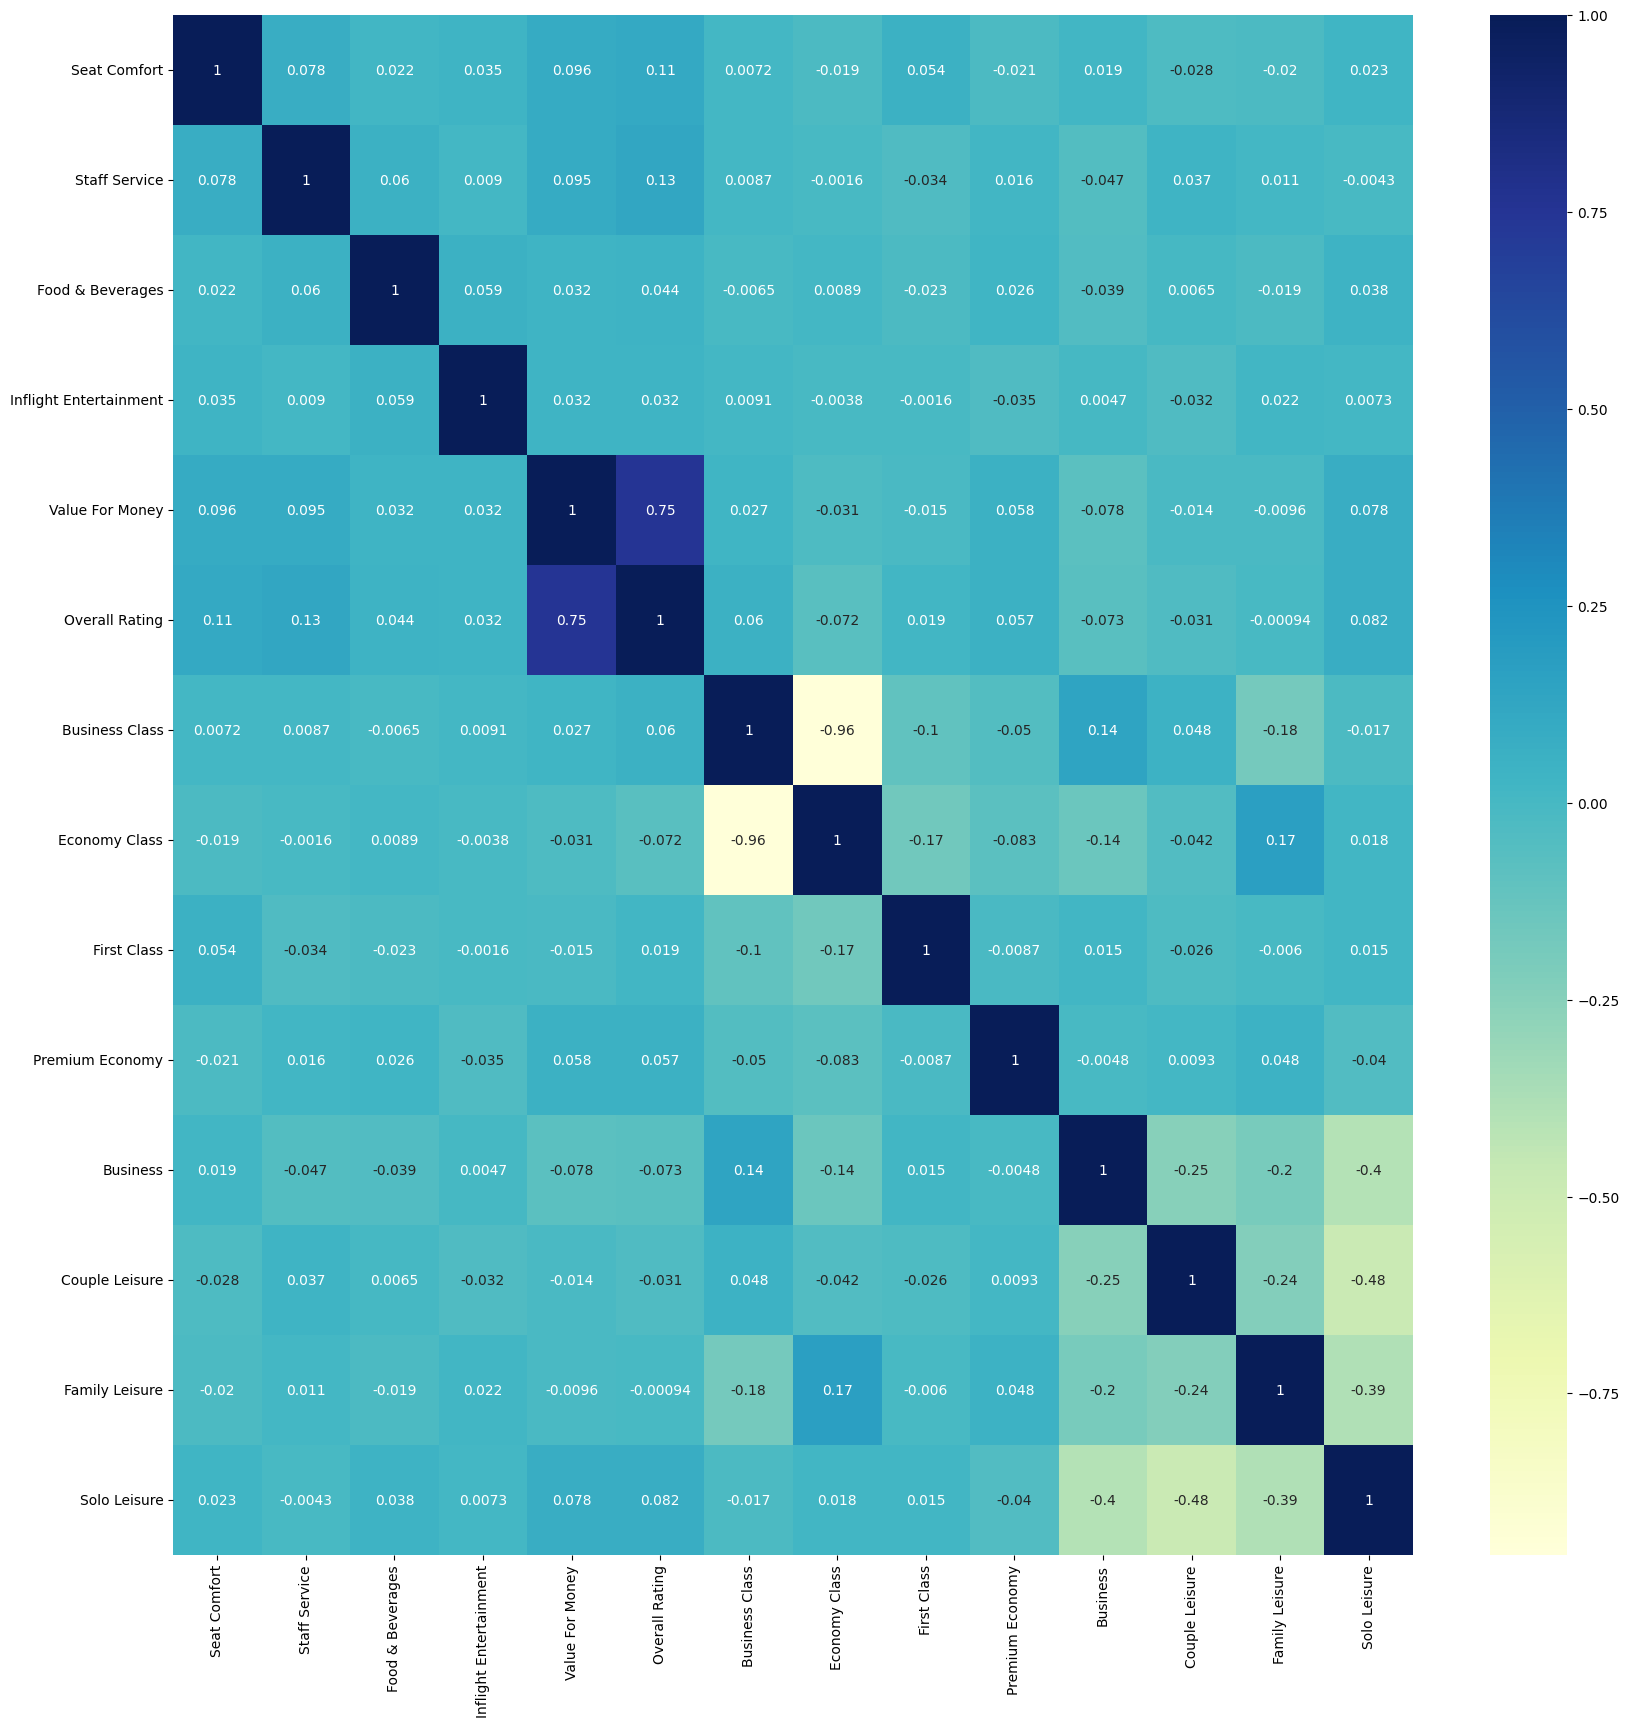

In [48]:
import seaborn as sns
data_numeric = data.select_dtypes(include =['int64','float64','boolean'])
data_numeric.head()
plt.figure(figsize = (20,20))
sns.heatmap(data_numeric.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [49]:
train, test = train_test_split(passengers, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train=train.drop(columns=['fiscal_year','number of passengers (Million)'])
y_train=train['number of passengers (Million)']

X_test=test.drop(columns=['fiscal_year','number of passengers (Million)'])
y_test=test['number of passengers (Million)']

#### Linear Regression Model

In [50]:
LR= LinearRegression()
model=LR.fit(X_train,y_train)

In [51]:
y_pred = model.predict(X_test)

In [52]:
X_test

,Verified,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Business Class,Economy Class,First Class,Premium Economy,Business,Couple Leisure,Family Leisure,Solo Leisure
1,0.436364,3.963636,4.286364,3.850000,4.054545,4.150000,7.595455,0.813636,0.445455,0.531818,0.022727,0.000000,0.186364,0.290909,0.118182,0.404545
4,0.919028,3.910931,4.242915,3.870445,4.036437,3.615385,6.704453,0.668016,0.336032,0.643725,0.020243,0.000000,0.190283,0.255061,0.170040,0.384615
5,0.904762,4.704762,4.761905,4.590476,4.466667,4.361905,8.780952,0.876190,0.257143,0.733333,0.000000,0.009524,0.161905,0.180952,0.190476,0.466667


In [53]:
print(y_pred)
print(y_test)

[30.21943435 30.56426328 10.89881831]
1    32.01
4    32.36
5     5.83
Name: number of passengers (Million), dtype: float64


In [54]:
import sklearn
print("R²= ",model.score(X_test,y_test))
print("MSE= ", sklearn.metrics.mean_squared_error(y_test, y_pred))

R²=  0.930636094603212
MSE=  10.707904919297633


In [55]:
model.predict(passengers_24)

array([37.50584254])

Ce qu'on sait à propos de l'année fiscale 2023/2024 , que le nombre de passagers chez qatar airlines a atteint 19M pendant les premiers six mois, donc si on multiplie cette valeurs par 2 on obtient 38M ce qui est très proche de la valeur obtenue.

![Qatar Airwas Passengers 2024](1.PNG)

#### Model building using RFE

In [56]:
R2=[]
MSE=[]
Pred_24=[]
for i in range(1,16):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    rfe.fit(X_train, y_train)
    y_pred= rfe.predict(X_test)
    R2.append(rfe.score(X_test,y_test)) 
    MSE.append(sklearn.metrics.mean_squared_error(y_test,y_pred))
    Pred_24.append(rfe.predict(passengers_24))



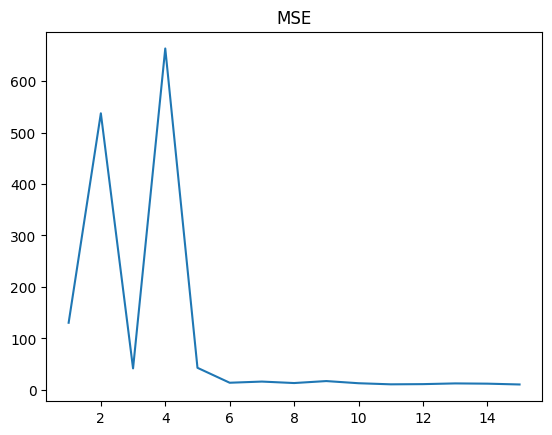

In [57]:
plt.plot(range(1,16), MSE)
plt.title("MSE")
plt.show()

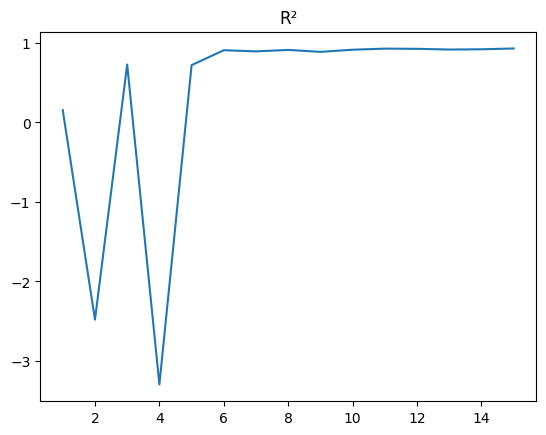

In [58]:
plt.plot(range(1,16), R2)
plt.title("R²")
plt.show()

Voici les valeurs de R² et MSE pour le modèle Linear Regression:

R²=  0.930636094603212

MSE=  10.707904919297633

In [59]:
# La liste des valeurs de R² pour le modèle RFE pour différentes valeurs de "n_features_to_select"
R2

[0.15476074667300532,
 -2.480919582153628,
 0.7291164444759637,
 -3.2968581048577645,
 0.7216232914131733,
 0.9096604262648547,
 0.894994934573697,
 0.9134475102632225,
 0.8886158407173514,
 0.9158281376257438,
 0.9295874362611752,
 0.9271704257188784,
 0.9181132837806326,
 0.9212805749814748,
 0.9315145481377899]

In [60]:
# La liste des valeurs de MSE pour le modèle RFE pour différentes valeurs de "n_features_to_select"
MSE

[130.482006555281,
 537.359534533191,
 41.81707099910465,
 663.3183033067936,
 42.97381051777972,
 13.945978970939093,
 16.20993296437927,
 13.361355957803582,
 17.19469196971907,
 12.993851687386064,
 10.869789313711761,
 11.242910159889682,
 12.641087124703567,
 12.15214330246146,
 10.572295528931376]

On remarque qu'en aucun cas le modèle RFE a pu gagner celui de régression linéaire (même avec 12 colonnes; le résultat que le PCA nous fournit). C'est pour cela qu'on juge que le modèle Regression Linéraire est le plus adapté à notre situation. 